In [51]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [52]:
# Read dataset
data = pd.read_csv("mnist_784.csv")  # the dataset must to be in your directory
n_samples = 70000                    # 70000 is the maximum amount of elements

# Model entries
x = np.asanyarray(data.drop(columns=['class']))[:n_samples,:]
y = np.asanyarray(data[['class']])[:n_samples].ravel()


In [53]:
# Split dataset for training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)


In [54]:
# Create our model
model = Pipeline([
    ('scaler', StandardScaler()),   # standard scaler
    ('pca', PCA(n_components=50)),  # to reduce images dimensionality
    ('svm', svm.SVC(gamma=0.0001))  # our classification model
])

In [55]:
# Trainning

# This will take several time depending on your machine and the samples you entered
model.fit(xtrain, ytrain)

# Score
print("Train: ", model.score(xtrain, ytrain))
print("Test: ", model.score(xtest, ytest))

Train:  0.9221428571428572
Test:  0.9224285714285714


In [48]:
# Predict
ypred = model.predict(xtest)

# Metrics
print("CLASSIFICATION REPORT: \n", metrics.classification_report(ytest, ypred))
print("\nCONFUSION MATRIX: \n", metrics.confusion_matrix(ytest, ypred))

SI
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       708
           1       0.94      0.98      0.96       792
           2       0.92      0.92      0.92       691
           3       0.89      0.88      0.89       731
           4       0.91      0.95      0.93       707
           5       0.89      0.89      0.89       606
           6       0.95      0.96      0.95       676
           7       0.94      0.91      0.92       731
           8       0.90      0.87      0.88       695
           9       0.89      0.87      0.88       663

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000


Confusion Matrix: 
 [[691   0   2   1   3   3   4   0   4   0]
 [  0 775   6   3   1   1   1   1   4   0]
 [  4   3 634  12   6   3   8   5  15   1]
 [  0   7  16 644   1  16   1  11  26   9]
 [  2   3   4   0 67

Text(0.5, 1.0, 'Prediction: 9')

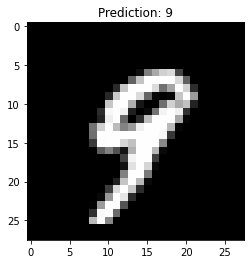

In [46]:
# Make predictions
sample = np.random.randint(xtest.shape[0])
plt.imshow(xtest[sample].reshape((28,28)), cmap=plt.cm.gray)
plt.title("Model Prediction: %i" % ypred[sample])